# Modelling
This notebook is responsible for the models that will try to predict the different target variables. This notebook implements 2 different types of models, namely a regularised regression model and a Random Forest model. Both models are implemented twice with the same feature set but two different target variables, namely standarised mean SCL and corrected HRV SDNN. 

#### Requirements
If one wants to run this notebook, make sure that you have run the `5-ak-window-processing` notebook. This notebook is responsible for adding the gender and age features

In [1]:
import pandas as pd
import numpy as np
import os
import random
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
project_dir = os.getcwd().split('\\')[:-1]
project_dir = '\\'.join(project_dir)
data_dir = project_dir + '\\data'
processed_dir = data_dir + '\\processed'
processed_files = os.listdir(processed_dir)
processed_files = [file for file in processed_files if file.endswith('hdf') and file.startswith('processed_')]

In [3]:
WINDOW = 180
STEP = 1
df = pd.read_hdf(f'{processed_dir}\\processed_window_{WINDOW}_step_{int(WINDOW * STEP)}.hdf')
features = ['mean_AU01', 'mean_change_AU01', 'mean_AU02', 'mean_change_AU02', 'mean_AU04',
           'mean_change_AU04', 'mean_AU05', 'mean_change_AU05', 'mean_AU06',
           'mean_change_AU06', 'mean_AU07', 'mean_change_AU07', 'mean_AU09',
           'mean_change_AU09', 'mean_AU10', 'mean_change_AU10', 'mean_AU12',
           'mean_change_AU12', 'mean_AU14', 'mean_change_AU14', 'mean_AU15',
           'mean_change_AU15', 'mean_AU17', 'mean_change_AU17', 'mean_AU20',
           'mean_change_AU20', 'mean_AU23', 'mean_change_AU23', 'mean_AU25',
           'mean_change_AU25', 'mean_AU26', 'mean_change_AU26', 'mean_AU45',
           'mean_change_AU45', 'std_AU01', 'std_AU02', 'std_AU04', 'std_AU05',
           'std_AU06', 'std_AU07', 'std_AU09', 'std_AU10', 'std_AU12', 'std_AU14',
           'std_AU15', 'std_AU17', 'std_AU20', 'std_AU23', 'std_AU25', 'std_AU26',
           'std_AU45', 'mean_Arousal', 'mean_Happy', 'mean_Sad', 'mean_Angry',
           'mean_Scared', 'std_pose_Tx', 'std_pose_Ty', 'std_pose_Tz',
           'std_pose_Rx', 'std_pose_Ry', 'std_pose_Rz', 'compound_Motion',
           'mean_PD', 'std_PD', 'max_PD', 'blink_rate', 'per_EC', 'leeftijd', 'geslacht']
targets = ['standardised_mean_scl', 'HRV_SDNN_corrected']
cols = features + targets + ['pp']
data = df[cols]

In [4]:
testset_pp = random.sample(list(df.pp.unique()), 10)
RF_test_df = df[df.pp.isin(testset_pp)].copy()
RF_train_df = df[~df.pp.isin(testset_pp)].copy()

LR_test_df = df[df.pp.isin(testset_pp)].copy()
LR_train_df = df[~df.pp.isin(testset_pp)].copy()

In [5]:
def create_plot(plot_data, target, model):
    fig, ax = plt.subplots()
    
    vmin = plot_data[['true_y', 'predicted_y']].min().min()
    vmax = plot_data[['true_y', 'predicted_y']].max().max()
    
    ax.scatter(x = plot_data['true_y'], y = plot_data['predicted_y'])
    ax.set_title(target)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_xlim(vmin, vmax)
    ax.set_ylim(vmin, vmax)
    ax.plot((vmin, vmax),(vmin, vmax), 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    plt.savefig(f'{project_dir}\\reports\\figures\\{model}_{target}.jpg')

Finding best LR model for: standardised_mean_scl
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    2.7s finished


Best parameters set found on validation set:
{'alpha': 10, 'l1_ratio': 0.1}
Best score found on validation set:
-0.08720373576565107

R Squared found on test data: 
0.012116473135647232
RMSE found on test data: 
0.6682057588264492

Finding best RF model for: standardised_mean_scl
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  8.9min finished


Best parameters set found on validation set:
{'max_depth': 4, 'max_features': 0.1, 'min_samples_split': 10}
Best score found on validation set:
-0.278712155144203

R Squared found on test data: 
0.07091166124947113
RMSE found on test data: 
0.6284366137596783

Finding best LR model for: HRV_SDNN_corrected
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best parameters set found on validation set:
{'alpha': 1000, 'l1_ratio': 0.5}
Best score found on validation set:
-0.15741133504427343

R Squared found on test data: 
-0.13781685712738057
RMSE found on test data: 
1693.8723502163928

Finding best RF model for: HRV_SDNN_corrected
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  9.3min finished


Best parameters set found on validation set:
{'max_depth': 4, 'max_features': 0.1, 'min_samples_split': 10}
Best score found on validation set:
-0.17354605794670225

R Squared found on test data: 
-0.058383135767882344
RMSE found on test data: 
1575.6190624022677



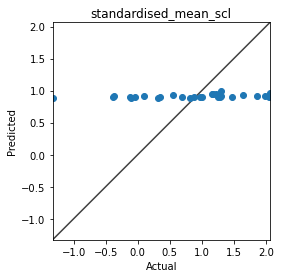

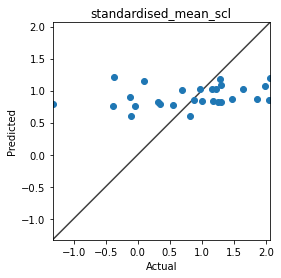

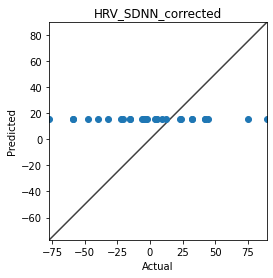

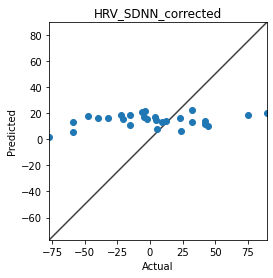

In [6]:
results = []
for model in ['RF', 'LR']:
    for target in targets:
        print(f'Finding best {model} model for: {target}')
        
        if model == 'LR':
            tuned_parameters = [{'alpha': [0.1, 1, 10, 100, 1000, 10000], 'l1_ratio':[0.1, 0.5, 0.9, 0.99]}]
            regr = ElasticNet(max_iter = 10000, normalize=False, random_state=0)
            
            train_df = LR_train_df.copy()
            test_df = LR_test_df.copy()
            
            scaler = StandardScaler()
            train_df = scaler.fit_transform(train_df)
            test_df = scaler.transform(test_df)
            
        else:
            tuned_parameters = [{'max_depth': [None, 4, 10],
                                 'min_samples_split':[2, 5, 10],
                                 'max_features': [0.1, 0.5, 0.9]}]
            regr = RandomForestRegressor(random_state=0, n_jobs=-1, n_estimators=5000)
            test_df = RF_test_df
            train_df = RF_train_df
        
        LPSO = GroupKFold(n_splits=10)
        split_iter = LPSO.split(train_df[features], train_df[target], train_df.pp)
        
        RMSE = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

        
        
        regression = GridSearchCV(regr, tuned_parameters, verbose=1, n_jobs=-1, cv=split_iter)
        
        regression.fit(train_df[features], train_df[target])
    
        print("Best parameters set found on validation set:")
        print(regression.best_params_)
        print("Best score found on validation set:")
        print(regression.best_score_)
        
        test_df = start_test_df
        
        pred_y = regression.best_estimator_.predict(X=test_df[features])
        true_y = test_df[target]

        print(f'\nR Squared found on test data: \n{regression.best_estimator_.score(X=test_df[features], y=test_df[target])}')
        print(f'RMSE found on test data: \n{mean_squared_error(y_true=test_df[target], y_pred=regression.best_estimator_.predict(X=test_df[features]))}\n')

        result = {}
        result['model'] = model
        result['target'] = target
        result['R_squared'] = regression.best_estimator_.score(X=test_df[features], y=test_df[target])
        result['RMSE'] = mean_squared_error(y_true=test_df[target], y_pred=regression.best_estimator_.predict(X=test_df[features]))
        results.append(result)
        
        plot_data = pd.DataFrame({'true_y': true_y, 'predicted_y': pred_y})
        
        create_plot(plot_data, target, model)
        
df = pd.DataFrame.from_records(results)

In [7]:
df

,model,target,R_squared,RMSE
0,LR,standardised_mean_scl,0.012116,0.668206
1,RF,standardised_mean_scl,0.070912,0.628437
2,LR,HRV_SDNN_corrected,-0.137817,1693.872350
3,RF,HRV_SDNN_corrected,-0.058383,1575.619062
